<a href="https://colab.research.google.com/github/ahmedmek1/Deep-learning-projects/blob/main/ECG_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction


In this notebook i want to predict different arrhytmia on ECG.
based on The MIT-BIH Arrhythmia Database contains 48 half-hour excerpts
of two-channel ambulatory ECG recordings, obtained from 47 subjects 
studied by the BIH Arrhythmia Laboratory between 1975 and 1979.
Twenty-three recordings were chosen at random from a set of 
4000 24-hour ambulatory ECG recordings collected from a mixed
population of inpatients (about 60%) and outpatients 
(about 40%)
at Boston's Beth Israel Hospital; the remaining 25 recordings
were selected from the same set to include less common but
clinically significant arrhythmias that would not be
well-represented in a small random sample.


   * souces : https://physionet.org/content/mitdb/1.0.0/

Arrhythmia Dataset


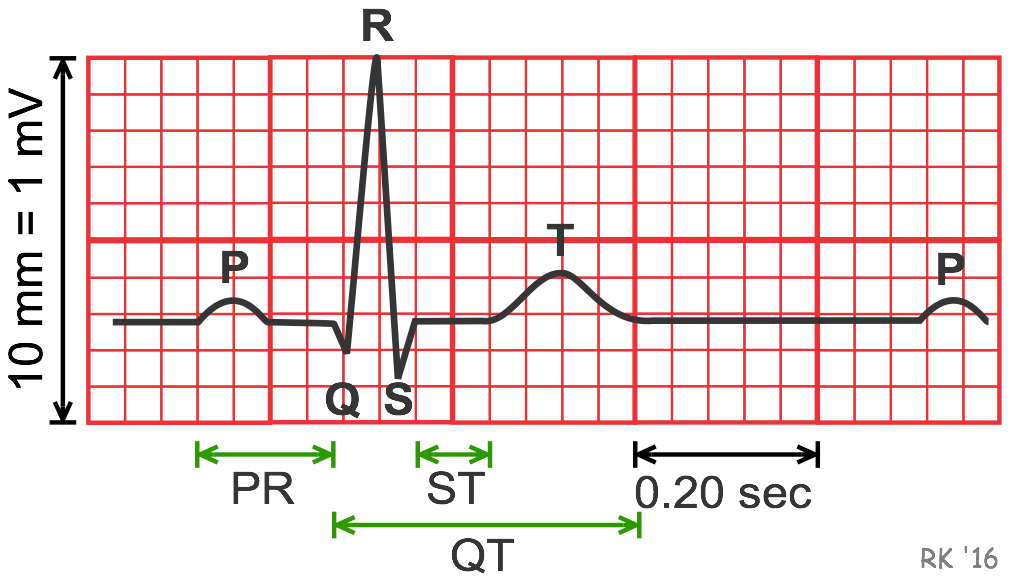

* Connecting to Google Drive 

In [ ]:
#Connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


## Data Exploration and preparation 

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df = pd.read_csv('mitbih_train.csv' ,header = None)
test_df = pd.read_csv('mitbih_test.csv' ,header = None)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape

(87554, 188)

In [ ]:
test_df.shape

(21892, 188)

## Data Analysis and Visualization

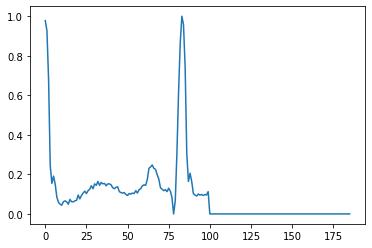

In [ ]:
plt.plot(train_df.iloc[0,:186])

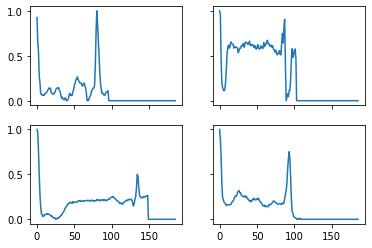

In [ ]:
import random 
n = random.random() 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(train_df.iloc[3,:186])
ax2.plot(train_df.iloc[2000,:186])
ax3.plot(test_df.iloc[20000,:186])
ax4.plot(test_df.iloc[85,:186])

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
train_df[187]=train_df[187].astype(int)
test_df[187]=test_df[187].astype(int)
Data_Balance=train_df[187].value_counts()
Data_Balance

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

* check the statues of the dataset

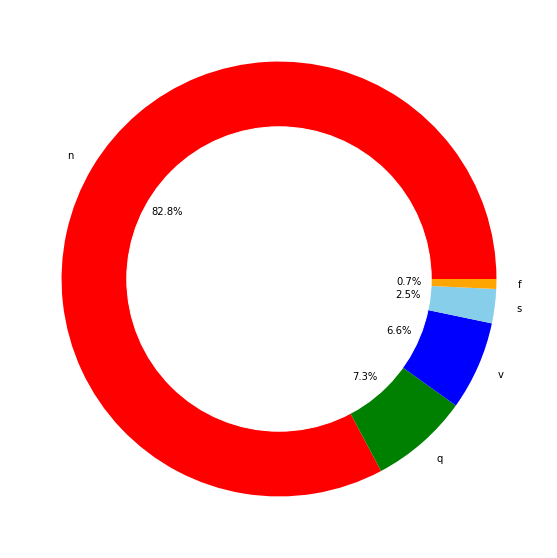

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Data_Balance, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* here we notice that the data is unbalanced so we will apply resampling to the data and data augmentation 

### Resampling and Data Augmentation





In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=25000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=25000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=25000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=25000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=25000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
Data_Balance =train_df[187].value_counts()
Data_Balance

0    25000
1    25000
2    25000
3    25000
4    25000
Name: 187, dtype: int64

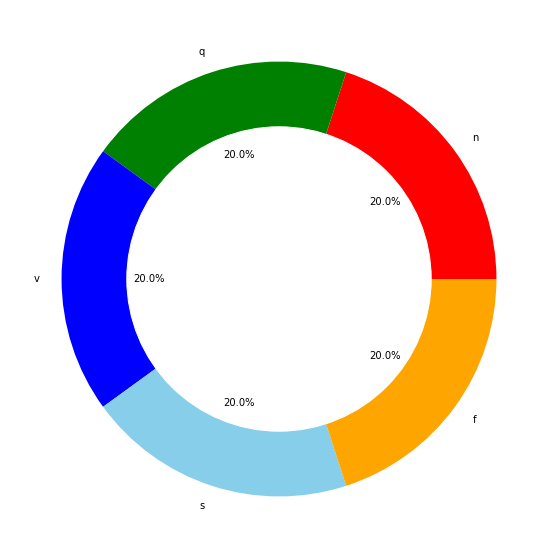

In [ ]:
plt.figure(figsize=(30,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Data_Balance, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
train_df[187].value_counts()

0    25000
1    25000
2    25000
3    25000
4    25000
Name: 187, dtype: int64

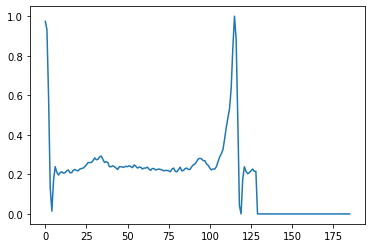

In [ ]:
plt.plot(train_df.iloc[2,:186])

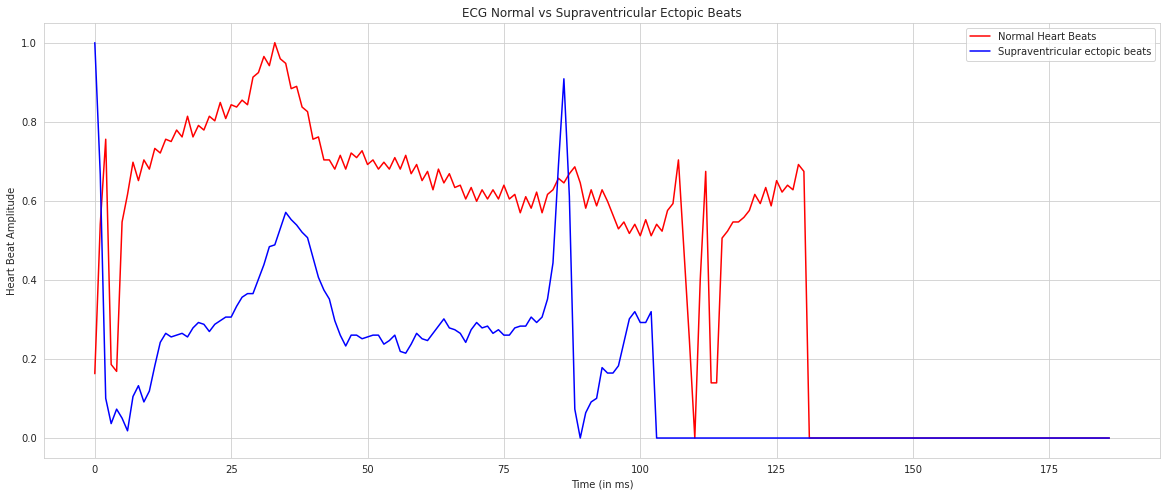

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_df.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

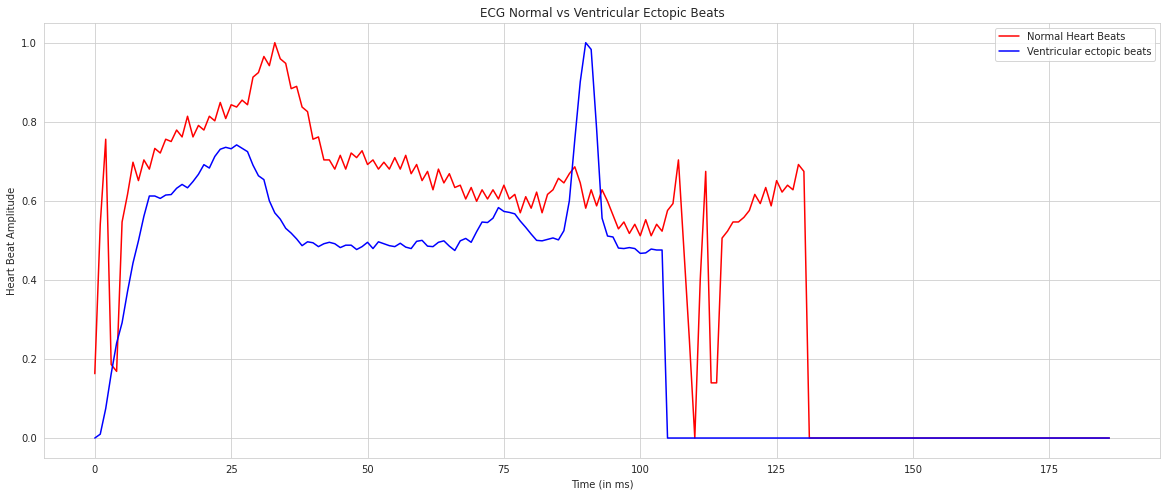

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_df.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

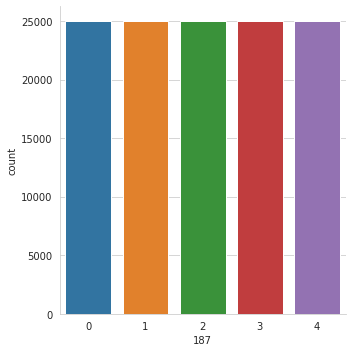

In [ ]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

In [ ]:
train_df.shape

(125000, 188)

In [ ]:
target_train = train_df[187]
target_test = test_df[187]

In [102]:
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [ ]:
# convert integer values into categorical one hot encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [ ]:
X_train = train_df.iloc[:, :-1].values
X_test = test_df.iloc[:, :-1].values

In [ ]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

### Building the Model

```



In [109]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(X_train,y_train,random_state=42,stratify=y_train,shuffle=True,train_size=0.75)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)

ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [99]:

#from keras.models import Sequential

model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv1D(64, 6, activation='relu', padding = 'same' , input_shape= ( 187, 1)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(3, strides = 2, padding = 'same'))

model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(pool_size=(3), strides = 2, padding = 'same'))

model.add(tf.keras.layers.Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax'))


In [100]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_50 (Conv1D)          (None, 187, 64)           448       
                                                                 
 batch_normalization_49 (Bat  (None, 187, 64)          256       
 chNormalization)                                                
                                                                 
 max_pooling1d_49 (MaxPoolin  (None, 94, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_51 (Conv1D)          (None, 94, 64)            24640     
                                                                 
 batch_normalization_50 (Bat  (None, 94, 64)           256       
 chNormalization)                                                
                                                        

In [103]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/20
3907/3907 [==============================] - 55s 11ms/step - loss: 0.1600 - accuracy: 0.9432 - val_loss: 0.2008 - val_accuracy: 0.9307
Epoch 2/20
3907/3907 [==============================] - 44s 11ms/step - loss: 0.0629 - accuracy: 0.9789 - val_loss: 0.1437 - val_accuracy: 0.9558
Epoch 3/20
3907/3907 [==============================] - 46s 12ms/step - loss: 0.0436 - accuracy: 0.9857 - val_loss: 0.1072 - val_accuracy: 0.9703
Epoch 4/20
3907/3907 [==============================] - 46s 12ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0917 - val_accuracy: 0.9766
Epoch 5/20
3907/3907 [==============================] - 46s 12ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.1169 - val_accuracy: 0.9718
Epoch 6/20
 650/3907 [===>..........................] - ETA: 36s - loss: 0.0275 - accuracy: 0.9912

KeyboardInterrupt: ignored